In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

# import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# DOWNLOAD DATASET AND BASIC REQUIREMNETS



# Importing header files and loading dataset 

In [2]:
import pandas as pd
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
import seaborn as sns
import plotly.express as px
pd.set_option('display.max_columns',None)

#### Download the data from my github

In [3]:
## Remember to click "view raw" of the csv file before you copying the link to below.

train_path = 'https://raw.githubusercontent.com/Mahsarnzh/Don-t-Get-Kicked/Ziang/me2300_data/train.csv'
train_df = pd.read_csv(train_path, index_col=False, error_bad_lines=False)

test_path = 'https://raw.githubusercontent.com/Mahsarnzh/Don-t-Get-Kicked/Ziang/me2300_data/test.csv'
test_df = pd.read_csv(test_path, index_col=False, error_bad_lines=False)


submissions_df_path = 'https://raw.githubusercontent.com/Mahsarnzh/Don-t-Get-Kicked/Ziang/me2300_data/sample_submission.csv'
submissions_df = pd.read_csv(submissions_df_path, index_col=False, error_bad_lines=False)

train_df.tail(3)



,IsBadBuy,VehicleAge,Make,Model,Trim,SubModel,Color,Transmission,WheelTypeID,WheelType,VehOdo,Nationality,Size,MMRAcquisitionAuctionAveragePrice,MMRAcquisitionAuctionCleanPrice,MMRAcquisitionRetailAveragePrice,MMRAcquisitonRetailCleanPrice,MMRCurrentAuctionAveragePrice,MMRCurrentAuctionCleanPrice,MMRCurrentRetailAveragePrice,MMRCurrentRetailCleanPrice,VehBCost,IsOnlineSale,WarrantyCost
25307,1,2,JEEP,PATRIOT FWD 4C,Spo,4D SUV SPORT,BLACK,AUTO,1.0,Alloy,62033,AMERICAN,SMALL SUV,8132.0,9389.0,12889.0,14036.0,8344.0,9618.0,12807.0,13642.0,8600.0,0,825
25308,0,6,CHEVROLET,MONTE CARLO 3.4L V6,LS,2D COUPE LS,BLACK,AUTO,1.0,Alloy,83081,AMERICAN,LARGE,3935.0,5111.0,4750.0,6020.0,3596.0,4893.0,4384.0,5784.0,3940.0,0,2452
25309,1,3,FORD,FUSION 4C,SE,4D SEDAN SE,GREY,AUTO,1.0,Alloy,72427,AMERICAN,MEDIUM,10257.0,11660.0,13867.0,14963.0,10290.0,11680.0,13921.0,15213.0,7415.0,0,803


In [4]:
# test_df.head(3)

In [5]:
# submissions_df.tail(3)

In [6]:
# submissions_df['Predicted'].tail(3)

#EXPLORATORY DATA ANALYSIS

In [7]:
train_df.isnull().sum()

IsBadBuy                                0
VehicleAge                              0
Make                                    0
Model                                   0
Trim                                  838
SubModel                                1
Color                                   1
Transmission                            1
WheelTypeID                          1834
WheelType                            1836
VehOdo                                  0
Nationality                             1
Size                                    1
MMRAcquisitionAuctionAveragePrice       7
MMRAcquisitionAuctionCleanPrice         7
MMRAcquisitionRetailAveragePrice        7
MMRAcquisitonRetailCleanPrice           7
MMRCurrentAuctionAveragePrice         108
MMRCurrentAuctionCleanPrice           108
MMRCurrentRetailAveragePrice          108
MMRCurrentRetailCleanPrice            108
VehBCost                                0
IsOnlineSale                            0
WarrantyCost                      

In [8]:
# train_df.info()

## IsBadBuy is the output of our classifer [target]

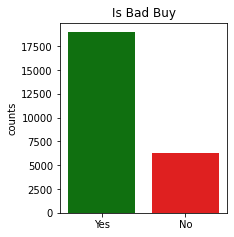

In [9]:
a=train_df.IsBadBuy.value_counts()
plt.figure(figsize=(3,3.5))
sns.barplot(x=['Yes','No'],y=a,palette=['g','r'])
plt.ylabel('counts')
plt.title("Is Bad Buy")
plt.show()


#### For Good Buy, the mean of distribution shift to left [younger], and vice versa.

Note: the age distribution for bad buy is so smooth, might already become "population distribution" instead of "smple distribution"

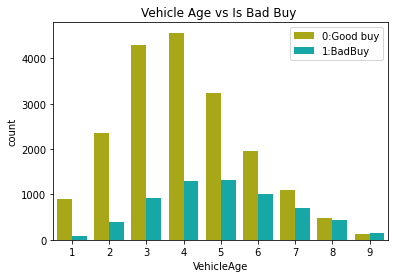

In [10]:
plt.title("Vehicle Age vs Is Bad Buy ")
sns.countplot(x = "VehicleAge", data =train_df, hue = "IsBadBuy",palette=['y','c'])
plt.legend(['0:Good buy','1:BadBuy'])
# good buy: gama distribution
# kafang distribution
plt.show()

## Make

For the brand which amount of transaction over 1000, all of them (**CHEVROLET, FORD, DODGE, CHRYSLER, PONTIAC**) have large probability to end up as a Bad Buy.

> All brands seems have large probability of leading a Bad Buy.

In [11]:
px.histogram(train_df, x = "Make", color = "IsBadBuy",height=500,width=800)

#### Drop some Maker that only appears on a too low frequency.

In [12]:
threshold = 200 # Anything that occurs less than this will be removed.
value_counts = train_df.Make.value_counts() # Specific column 
to_remove = value_counts[value_counts <= threshold].index
train_df.Make.replace(to_remove, np.nan, inplace=True)
train_df.Make.fillna('Make_unk',inplace=True)

print(train_df.Make.value_counts().keys())
# px.histogram(train_df, x = "Make", color = "IsBadBuy",height=500,width=800)

Index(['CHEVROLET', 'DODGE', 'FORD', 'CHRYSLER', 'PONTIAC', 'KIA', 'NISSAN',
       'SATURN', 'HYUNDAI', 'JEEP', 'Make_unk', 'SUZUKI', 'TOYOTA',
       'MITSUBISHI', 'MAZDA', 'MERCURY', 'BUICK', 'GMC'],
      dtype='object')


In [13]:
def replace_labels(df, col_df, original_Key, new_Key):
  idxs = df[(col_df == original_Key)].index
  col_df[idxs] = new_Key

In [14]:
x_titles = train_df.Make.value_counts().keys()
y_titles = [None] * len(x_titles)
for idx in range(len(x_titles)):
  curr = train_df[(train_df.Make == x_titles[idx])].count()[1]
  curr_bad = train_df[(train_df.Make== x_titles[idx])&(train_df.IsBadBuy==1)].count()[1]
  ratio = curr_bad/curr
  y_titles[idx] = ratio
  original_Key = x_titles[idx]
  
  if (ratio <= 0.24):
    new_Key = 'low'
  elif (ratio >= 0.30):
    new_Key = 'high'
  elif ((ratio > 0.24) & (ratio < 0.30)):
    new_Key = 'mid'
  
  replace_labels(train_df, train_df.Make, original_Key, new_Key)
  replace_labels(test_df, test_df.Make, original_Key, new_Key)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying t

In [15]:
def plot_distribution_ofCurrLoc(df, col_df, target_df, colName):
  x_titles = col_df.value_counts().keys()
  y_titles = [None] * len(x_titles)
  for idx in range(len(x_titles)):
    curr = df[(col_df == x_titles[idx])].count()[1]
    curr_bad = df[(col_df == x_titles[idx])&(target_df ==1)].count()[1]
    ratio = curr_bad/curr
    y_titles[idx] = ratio
    print(str(x_titles[idx]) + "\t{0:.2%}\t".format(ratio) + str(curr))
  
  plt.figure(figsize=(20, 8))
  plt.title("Probability of bad buys depending"+colName,fontsize=32)
  plt.ylabel('Probability',fontsize=16)
  plt.xlabel('Maker',fontsize=16)
  sns.barplot(x=x_titles,y=y_titles)
  plt.show()

low	21.38%	12242
mid	27.76%	12145
high	31.85%	923


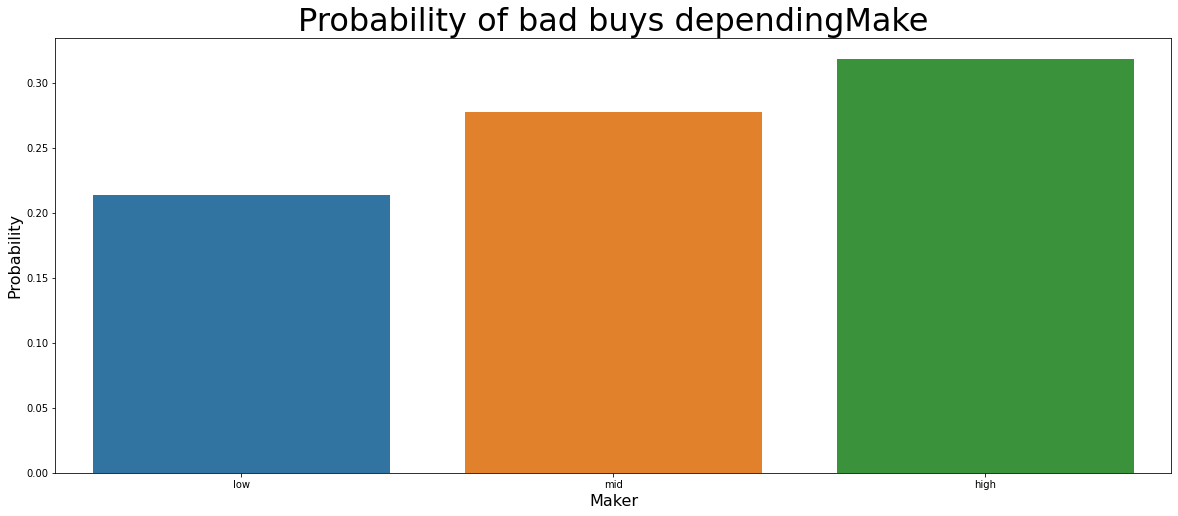

In [16]:
plot_distribution_ofCurrLoc(train_df, train_df.Make, train_df.IsBadBuy, 'Make')

## Nationality


In [17]:
px.histogram(train_df, x = "Nationality", color = "IsBadBuy",height=400,width=800)

AMERICAN	24.50%	21092
OTHER ASIAN	26.81%	2812
TOP LINE ASIAN	25.60%	1344
OTHER	27.87%	61


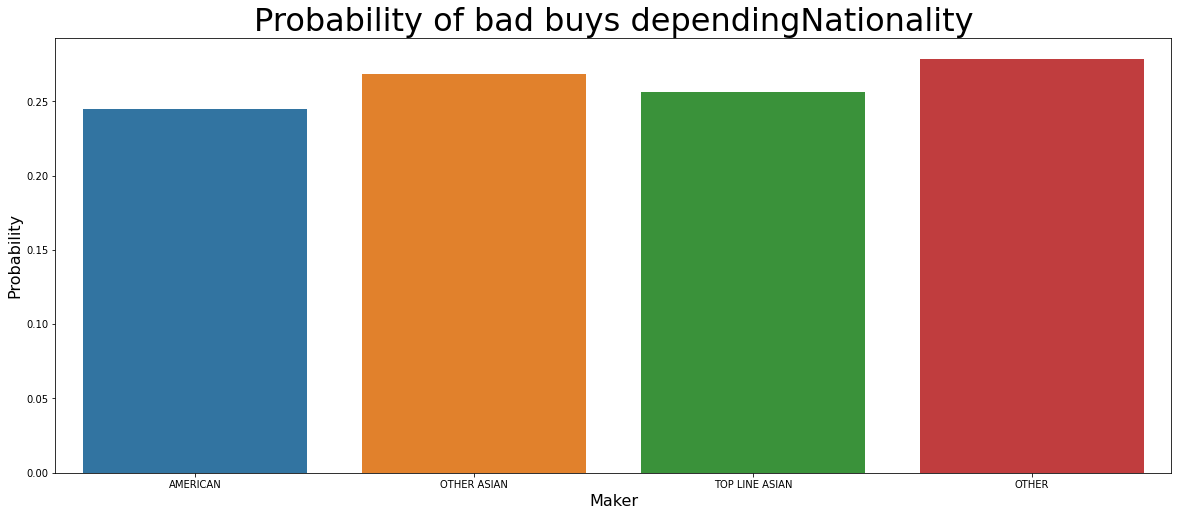

In [18]:
plot_distribution_ofCurrLoc(train_df, train_df.Nationality, train_df.IsBadBuy, 'Nationality')

## MMR-Acquisition and MMR-Current Price

### MMRAcquisitionAuctionAveragePrice & MMRAcquisitionRetailAveragePrice

It's obvious that we need to drop the data beyound 18K for MMRAcquisitionAuctionAveragePrice
> [Idea #1] always drop the data that fall ourside of 2.5%-97.2%  
> **[Idea #2] USE PCA TO NORMALIZE DATA!!!!!!!!!!!**


In [19]:
# px.scatter(train_df, x = 'MMRAcquisitionAuctionAveragePrice', y = 'MMRAcquisitionRetailAveragePrice', color = 'IsBadBuy',height=500,width=1000)

### MMRAcquisitionAuctionAveragePrice & MMRCurrentAverageAveragePrice

It's obvious that we need to drop the data beyound 18K for MMRAcquisitionAuctionAveragePrice; as well as 0k.


In [20]:
# px.scatter(train_df, x = 'MMRAcquisitionAuctionAveragePrice', y = 'MMRCurrentAuctionAveragePrice' ,color = 'IsBadBuy',height=500,width=1000)

## Correlation? 

Note: there are many missing data and some off data which will be definitely droped  


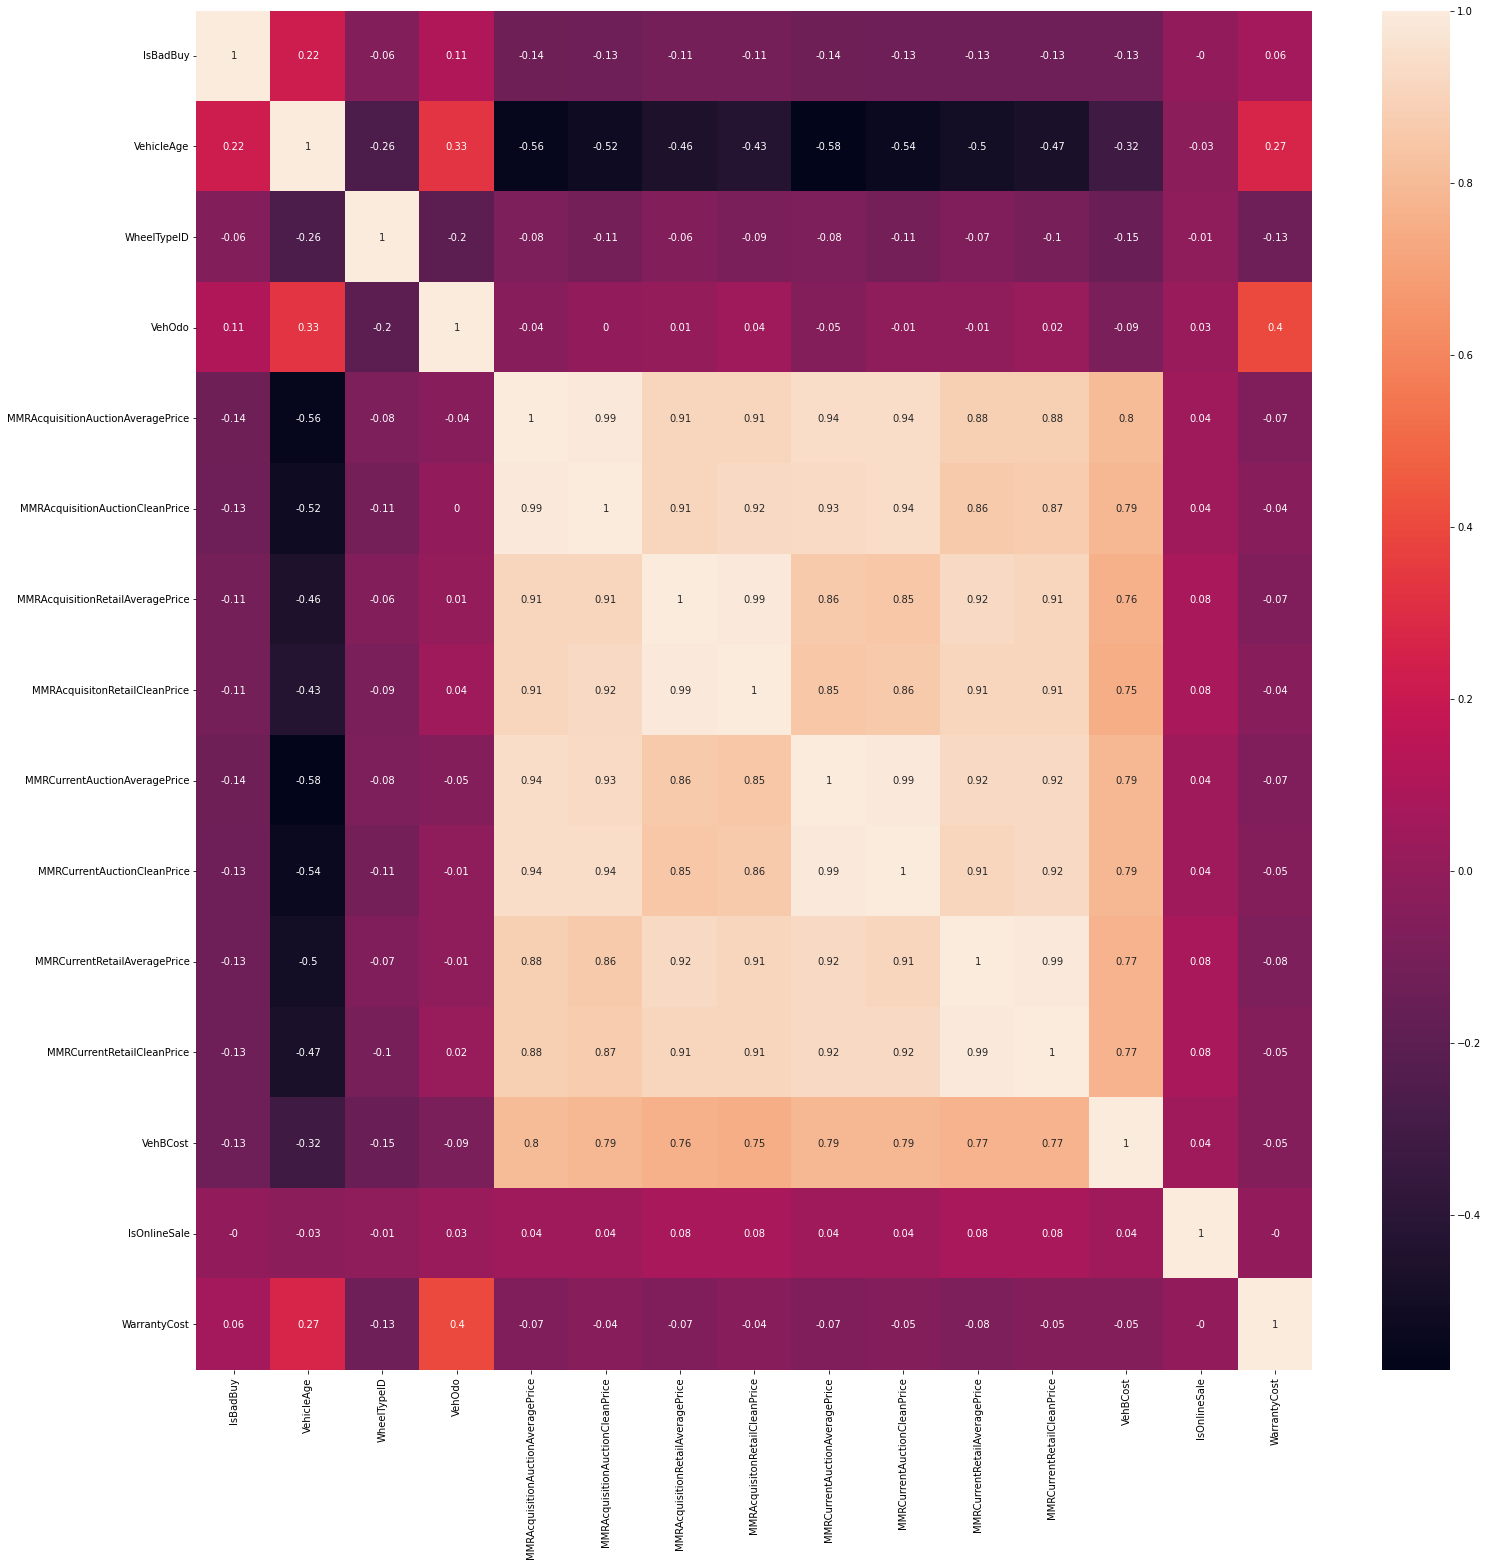

In [21]:
## remember "IsBadBuy" is our target.
plt.figure(figsize=(25,25))
correlation_matrix = train_df.corr().round(2)
# annot = True to print the values inside the square
sns.heatmap(data=correlation_matrix, annot=True)

## Analysis made:

* The given Dataset has Dataset alot of Yes for **`IsBadBuy`** column (alot of zeros denoting good buy)
* Maximum cars comming for resale is **3-4 yrs** old and is mostly considered a good buy compared to the ones which are **4-5 years** old
* **OTHER ASIAN** countries seem to dominate the probability of bad buys when segregated according to nationality (**OTHERS** only have few records -- hence, the propbability data is no representative.)
* Resale Cars from **America** can be bought as it has less chances of beeing a bad buy as compared to the other nationalities 
* **Ford** and **Chevrolet** cars have a high chance of being a bad buy

# Feature Engineering -- Stage 1

In [22]:
# print("Description about the columns of Dataset:-\n")
# text_file = open('metaData.txt')
# file_content = text_file.read()
# print(file_content)
# text_file.close()

## Delete Some Prices...

1. Back to previous data ploting, we can drop one of the colinearity columns. -- we choose to drop all of XXX_AveragePrice as they have higher correlation toward VehicleAge (which is definitaly be selected for classifer model.)

In [23]:
train_df.drop(['MMRAcquisitionAuctionAveragePrice','MMRAcquisitionRetailAveragePrice','MMRCurrentAuctionAveragePrice','MMRCurrentRetailAveragePrice', 'MMRAcquisitionAuctionCleanPrice', 'MMRAcquisitonRetailCleanPrice', 'MMRCurrentAuctionCleanPrice', 'MMRCurrentRetailCleanPrice'],axis=1,inplace=True)
test_df.drop(['MMRAcquisitionAuctionAveragePrice','MMRAcquisitionRetailAveragePrice','MMRCurrentAuctionAveragePrice','MMRCurrentRetailAveragePrice', 'MMRAcquisitionAuctionCleanPrice', 'MMRAcquisitonRetailCleanPrice', 'MMRCurrentAuctionCleanPrice', 'MMRCurrentRetailCleanPrice' ],axis=1,inplace=True)

## Handle WheelType and WheelTypeID

### Replace WheelType to numerical value based on the possibility of "IsBadBuy"

2. **WheelTypeID and WheelType** seems weird... but still should keep.
3. We should handle the WheelType and WheelTypeID as they are representing same thing with string and numerical value, respectively.

Alloy	22.49%	12284
Covers	17.35%	10922
WheelType_unk	84.59%	1836
Special	26.87%	268


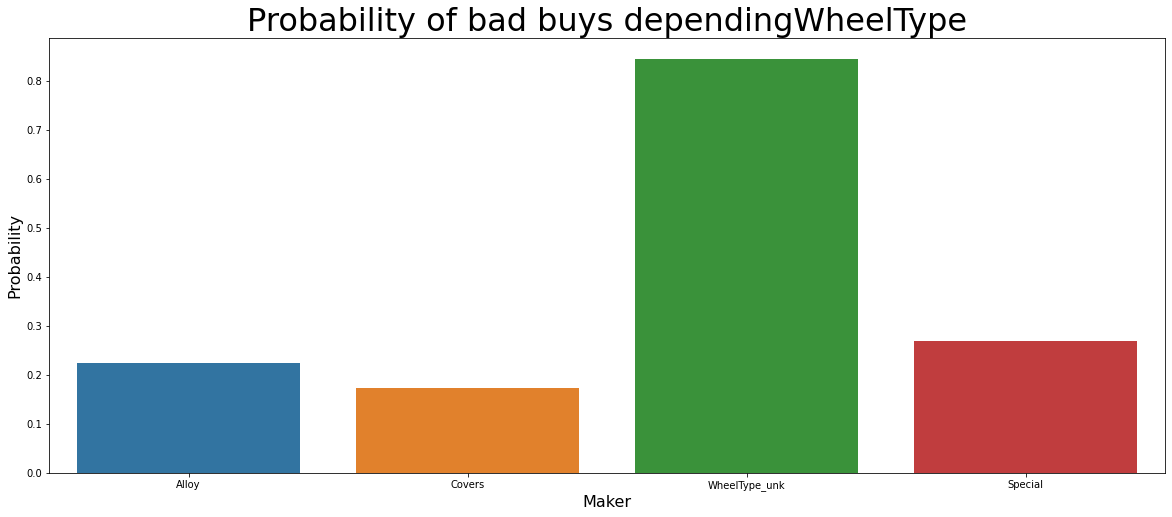

In [24]:
# train_df.WheelType.value_counts(dropna=False)
# train_df.WheelType.value_counts(dropna=False)
train_df.WheelType.fillna('WheelType_unk',inplace=True)
test_df.WheelType.fillna('WheelType_unk',inplace=True)
plot_distribution_ofCurrLoc(train_df, train_df.WheelType, train_df.IsBadBuy, 'WheelType')

Based on the magnitude different, I want to replace it with numerical values. However the original WheelTypeID is not consistent with the rank. Hence, I prefer to encode the string-label into numerical one by myself.

In [25]:
def handle_WheelType_encoding():
  # Alloy	22.49%	12284
  replace_labels(train_df, train_df.WheelType, "Alloy", 22)
  replace_labels(test_df, test_df.WheelType, "Alloy", 22)
  # Covers	17.35%	10922
  replace_labels(train_df, train_df.WheelType, "Covers", 17)
  replace_labels(test_df, test_df.WheelType, "Covers", 17)
  # WheelType_unk	84.59%	1836
  replace_labels(train_df, train_df.WheelType, "WheelType_unk", 84)
  replace_labels(test_df, test_df.WheelType, "WheelType_unk", 84)
  # Special	26.87%	268
  replace_labels(train_df, train_df.WheelType, "Special", 26)
  replace_labels(test_df, test_df.WheelType, "Special", 26)

In [26]:
handle_WheelType_encoding()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [27]:
train_df.WheelType.value_counts(dropna=False)

22    12284
17    10922
84     1836
26      268
Name: WheelType, dtype: int64

### Once I replaced the value inside of the WheelType, I can drop the WheelTypeID colomun

In [28]:
train_df.drop(['WheelTypeID'],axis=1,inplace=True)
test_df.drop(['WheelTypeID'],axis=1,inplace=True)

# Feature Engineering -- Stage 2


In [29]:
## This is only works for the default
def view_col_basedOnType(isNumerical, col_Name):
  imputed_Value = col_Name + '_unk'
  if not (isNumerical):
    train_df[col_Name].fillna('Trim_unk',inplace=True)
    test_df[col_Name].fillna('Trim_unk',inplace=True)
  else:
    # impute
    pass
  plot_distribution_ofCurrLoc(train_df, train_df[col_Name], train_df.IsBadBuy, col_Name)


AMERICAN	24.50%	21092
OTHER ASIAN	26.81%	2812
TOP LINE ASIAN	25.60%	1344
OTHER	27.42%	62


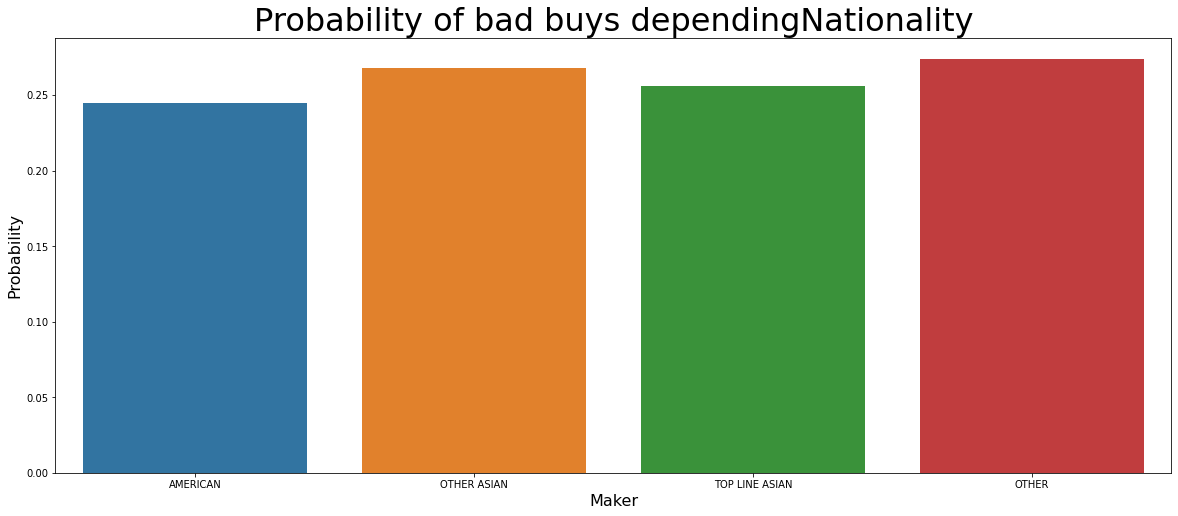

In [30]:
train_df['Nationality'].fillna('OTHER',inplace=True)
test_df['Nationality'].fillna('OTHER',inplace=True)
view_col_basedOnType(isNumerical = False, col_Name = 'Nationality')

In [31]:
## Overall View
train_df.isnull().sum()

## compacted version
# print("For Training Dataset:")
# df=pd.DataFrame(train_df.isna().sum())
# df.rename({0:'counts'},axis=1,inplace=True)
# df[(df.counts>0)]

IsBadBuy          0
VehicleAge        0
Make              0
Model             0
Trim            838
SubModel          1
Color             1
Transmission      1
WheelType         0
VehOdo            0
Nationality       0
Size              1
VehBCost          0
IsOnlineSale      0
WarrantyCost      0
dtype: int64

In [32]:
## Overall View
test_df.isnull().sum()

# ## compacted version
# print("For Test Dataset:")
# df=pd.DataFrame(test_df.isna().sum())
# df.rename({0:'counts'},axis=1,inplace=True)
# df[(df.counts>0)]

VehicleAge        0
Make              0
Model             0
Trim            401
SubModel          2
Color             2
Transmission      2
WheelType         0
VehOdo            0
Nationality       0
Size              0
VehBCost          0
IsOnlineSale      0
WarrantyCost      0
dtype: int64

## Notes the difference between numerical_cols and categorical_cols

In [33]:
train_df_categorical_cols = train_df.select_dtypes(include = 'object').columns.tolist()
train_df_numeric_cols = train_df.select_dtypes(exclude='object').columns.tolist()


In [34]:
print("For Training Set:")
print('Categorical_cols')
print(train_df[train_df_categorical_cols].keys())
print('Numerical_cols')
print(train_df[train_df_numeric_cols].keys())

For Training Set:
Categorical_cols
Index(['Make', 'Model', 'Trim', 'SubModel', 'Color', 'Transmission',
       'WheelType', 'Nationality', 'Size'],
      dtype='object')
Numerical_cols
Index(['IsBadBuy', 'VehicleAge', 'VehOdo', 'VehBCost', 'IsOnlineSale',
       'WarrantyCost'],
      dtype='object')


In [35]:
print("For Testing Set:")
print('Categorical_cols')
print(train_df[train_df_categorical_cols].keys())
print('Numerical_cols')
print(train_df[train_df_numeric_cols].keys())

For Testing Set:
Categorical_cols
Index(['Make', 'Model', 'Trim', 'SubModel', 'Color', 'Transmission',
       'WheelType', 'Nationality', 'Size'],
      dtype='object')
Numerical_cols
Index(['IsBadBuy', 'VehicleAge', 'VehOdo', 'VehBCost', 'IsOnlineSale',
       'WarrantyCost'],
      dtype='object')


In [36]:
test_df_categorical_cols = test_df.select_dtypes(include = 'object').columns.tolist()
test_df_numeric_cols = test_df.select_dtypes(exclude='object').columns.tolist()

### Use InterativeImputer to fillna for numeric_cols

In [37]:
from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
# imputer=SimpleImputer(strategy='mean');
imputer = IterativeImputer(random_state=4)

imputer.fit(train_df[train_df_numeric_cols]);
train_df[train_df_numeric_cols]=imputer.transform(train_df[train_df_numeric_cols]);

imputer.fit(train_df[test_df_numeric_cols]);
test_df[test_df_numeric_cols]=imputer.transform(test_df[test_df_numeric_cols]);

## Note the features that have too many labels.

In [38]:
for col in train_df:
   print(col," \t\t\t value_counts: \t",len(train_df[f'{col}'].value_counts()))

IsBadBuy  			 value_counts: 	 2
VehicleAge  			 value_counts: 	 9
Make  			 value_counts: 	 3
Model  			 value_counts: 	 898
Trim  			 value_counts: 	 124
SubModel  			 value_counts: 	 693
Color  			 value_counts: 	 16
Transmission  			 value_counts: 	 3
WheelType  			 value_counts: 	 4
VehOdo  			 value_counts: 	 19923
Nationality  			 value_counts: 	 4
Size  			 value_counts: 	 12
VehBCost  			 value_counts: 	 1843
IsOnlineSale  			 value_counts: 	 2
WarrantyCost  			 value_counts: 	 263


### Try to handle Model, Trim, Color, SubModel, WarrantyCost, VehBCost, Size. While delete VehOdo

### Handling Trim

Bas	24.27%	4850
LS	18.74%	3384
SE	25.15%	3240
SXT	21.45%	1254
LT	15.92%	1168
Trim_unk	30.31%	838
LX	22.88%	826
Tou	26.70%	824
EX	25.94%	748
XLT	36.69%	507
Spo	29.53%	464
GLS	25.22%	464
SEL	19.00%	458
SLT	26.95%	397
Lim	31.37%	357
Lar	30.09%	319
XLS	37.54%	301
GT	28.12%	288
2	31.06%	264
ST	26.36%	258
ES	27.49%	251
ZX4	28.22%	241
S	27.73%	238
SES	35.37%	229
LE	24.53%	212
SLE	21.53%	209
XL	26.90%	171
i	21.34%	164
GL	31.45%	159
Cla	29.61%	152
Nor	23.78%	143
150	26.50%	117
GS	32.69%	104
Cus	41.18%	102
ZX3	31.52%	92
STX	16.30%	92
CX	20.22%	89
Edd	28.92%	83
Adv	19.74%	76
CE	21.21%	66
s	44.62%	65
3	16.92%	65
XE	14.06%	64
L30	38.89%	54
L20	31.11%	45
LXi	43.18%	44
1	11.36%	44
Edg	31.58%	38
CXL	22.22%	36
ZX5	33.33%	36
W/T	13.79%	29
SS	44.83%	29
SV6	17.86%	28
ZTS	34.62%	26
SR5	13.04%	23
DX	31.82%	22
GTP	18.18%	22
SX	14.29%	21
SL	10.00%	20
Pre	16.67%	18
GXE	27.78%	18
Z71	27.78%	18
Plu	50.00%	16
R/T	43.75%	16
DE	6.67%	15
Lux	20.00%	15
LW3	73.33%	15
SL2	33.33%	15
Her	50.00%	14
SL1	14.29%	14
Ren	30.77

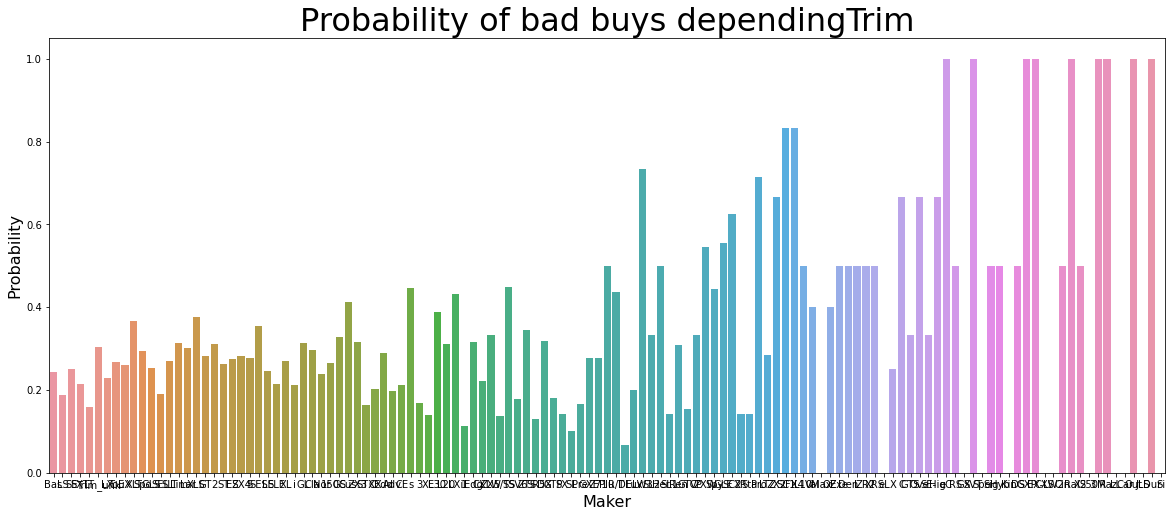

In [39]:
view_col_basedOnType(isNumerical = False, col_Name = 'Trim')

In [40]:
def refine_labels_of_eachCol_5Layer(df, test_df ,targetcolName, colName, CriticalRatioList):
  x_titles = df[colName].value_counts().keys()
  y_titles = [None] * len(x_titles)
  for idx in range(len(x_titles)):
    curr = df[(df[colName] == x_titles[idx])].count()[1]
    curr_bad = df[(df[colName] == x_titles[idx])&(df[targetcolName] ==1)].count()[1]
    ratio = curr_bad/curr
    y_titles[idx] = ratio
    original_Key = x_titles[idx]
    # print(str(x_titles[idx]) + "\t{0:.2%}\t".format(ratio) + str(curr))

    if (ratio <= CriticalRatioList[0]):
      newKey = 'low'
    elif ((ratio <= CriticalRatioList[1])&(ratio > CriticalRatioList[0])):
      newKey = 'mid1'
    elif ((ratio <= CriticalRatioList[2])&(ratio > CriticalRatioList[1])):
      newKey = 'mid2'
    elif ((ratio <= CriticalRatioList[3]) & (ratio > CriticalRatioList[2])):
      newKey = 'mid3'
    elif ((ratio <= CriticalRatioList[4])&(ratio > CriticalRatioList[3])):
      newKey = 'high1'
    else:
      newKey = 'high2'

    replace_labels(df, df[colName], original_Key, newKey)
    replace_labels(test_df, test_df[colName], original_Key, newKey)

In [41]:
refine_labels_of_eachCol_5Layer(df = train_df, test_df = test_df ,targetcolName = 'IsBadBuy',
                         colName = 'Trim', CriticalRatioList = [0.18, 0.22, 0.28, 0.32, 0.46])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying t

mid2	25.00%	12815
mid1	19.59%	5737
mid3	30.07%	3382
low	15.31%	1652
high1	37.38%	1565
high2	62.89%	159


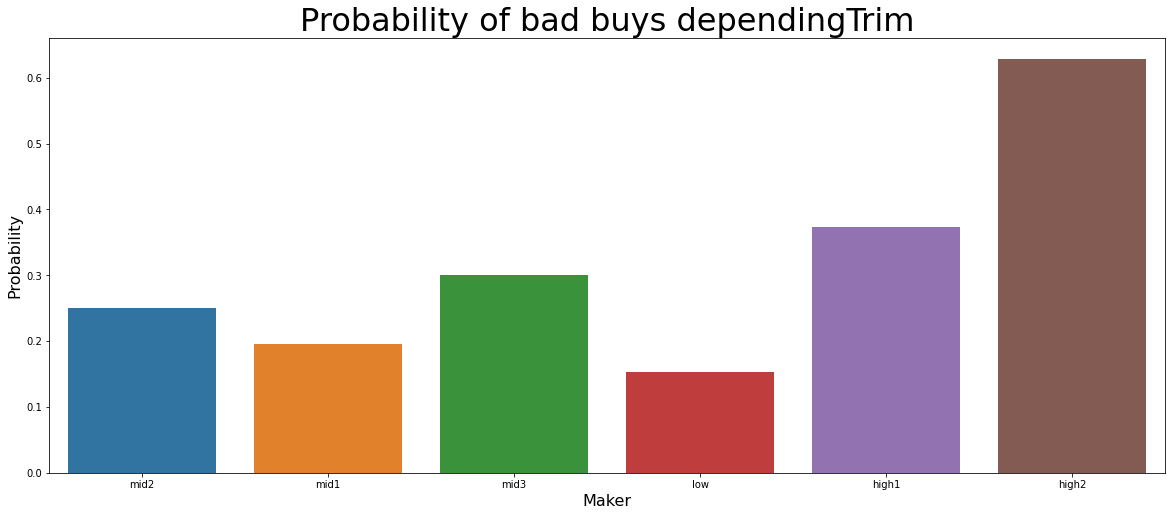

In [42]:
view_col_basedOnType(isNumerical = False, col_Name = 'Trim')

### Handling Color

SILVER	24.67%	5177
WHITE	25.12%	4228
BLUE	23.25%	3557
GREY	24.01%	2695
BLACK	22.74%	2612
RED	27.16%	2176
GOLD	27.67%	1854
GREEN	24.29%	1120
MAROON	26.92%	702
BEIGE	25.80%	566
ORANGE	15.23%	151
BROWN	26.24%	141
PURPLE	30.22%	139
OTHER	23.81%	84
YELLOW	33.33%	78
NOT AVAIL	56.67%	30


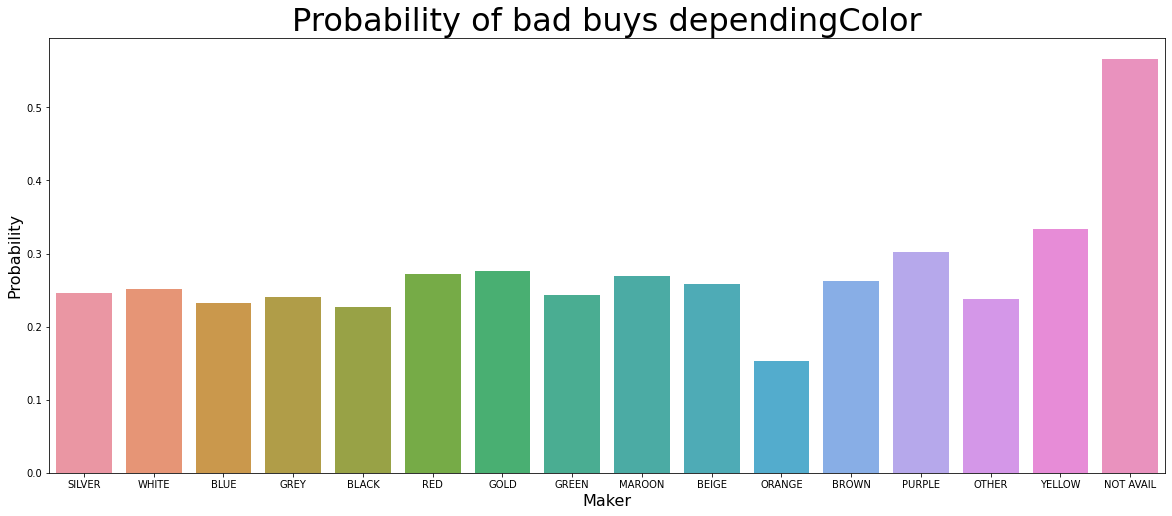

In [43]:
train_df['Color'].fillna('NOT AVAIL',inplace=True)
test_df['Color'].fillna('NOT AVAIL',inplace=True)
view_col_basedOnType(isNumerical = False, col_Name = 'Color')

In [44]:
refine_labels_of_eachCol_5Layer(df = train_df, test_df = test_df ,targetcolName = 'IsBadBuy',
                         colName = 'Color', CriticalRatioList = [0.18, 0.22, 0.28, 0.35, 0.46])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying t

mid2	24.79%	24912
mid3	31.34%	217
low	15.23%	151
high2	56.67%	30


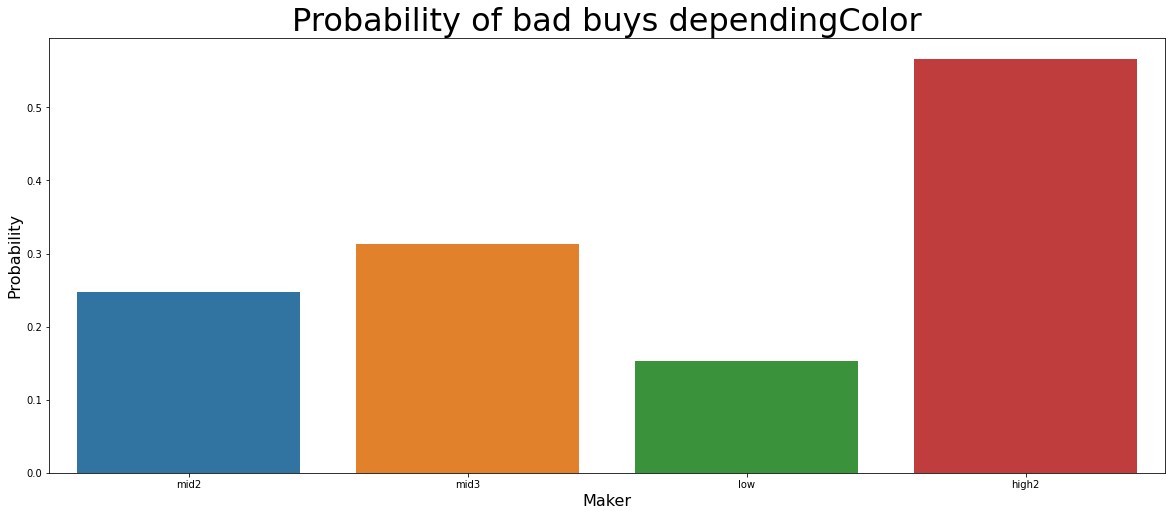

In [45]:
view_col_basedOnType(isNumerical = False, col_Name = 'Color')

### Handling Model

In [46]:
train_df['Model'].fillna('Model_unk',inplace=True)
test_df['Model'].fillna('Model_unk',inplace=True)
# view_col_basedOnType(isNumerical = False, col_Name = 'Model');

In [47]:
refine_labels_of_eachCol_5Layer(df = train_df, test_df = test_df ,targetcolName = 'IsBadBuy',
                         colName = 'Model', CriticalRatioList = [0.18, 0.22, 0.28, 0.35, 0.46])

流式输出内容被截断，只能显示最后 5000 行内容。
See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable

low	12.23%	7636
mid3	31.14%	5918
mid2	25.08%	4530
mid1	19.94%	3897
high1	39.86%	2002
high2	59.91%	1327


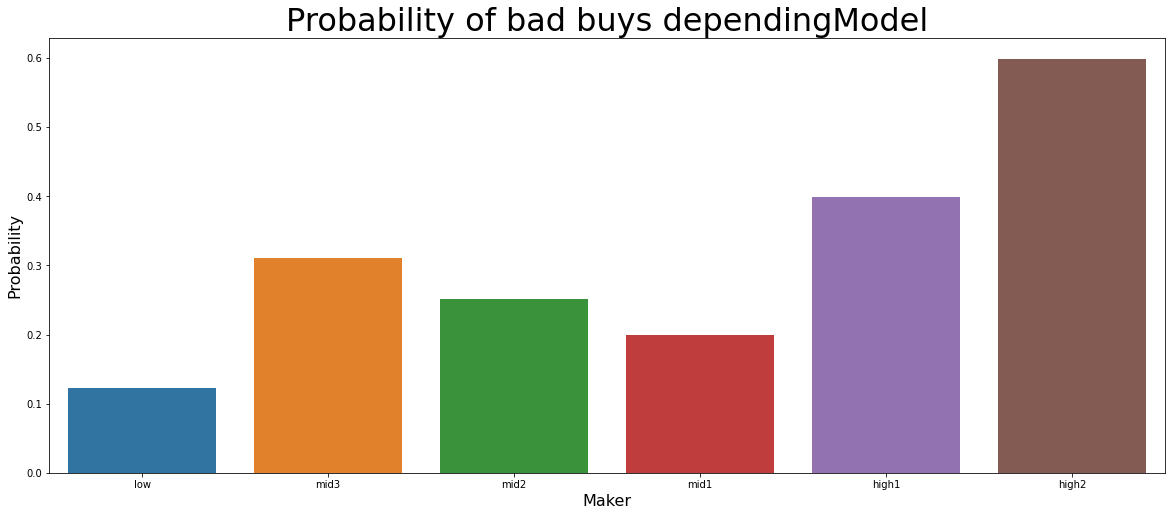

In [48]:
view_col_basedOnType(isNumerical = False, col_Name = 'Model')

### Handling SubModel

4D SEDAN	24.24%	5264
4D SEDAN LS	17.16%	1573
4D SEDAN SE	27.14%	1341
4D WAGON	19.75%	800
MINIVAN 3.3L	21.36%	398
4D SEDAN LT	14.68%	395
4D SUV 4.2L LS	23.35%	394
2D COUPE	33.42%	380
4D SEDAN LX	25.69%	362
4D SEDAN SXT FFV	6.91%	333
4D SEDAN EX	20.94%	320
4D SEDAN SEL	15.36%	280
4D SEDAN LT 3.5L	9.28%	237
4D SPORT	19.74%	228
4D SEDAN LEVEL 2	30.53%	226
4D SEDAN ES	25.89%	197
4D SEDAN S	26.98%	189
4D SEDAN SE1	29.79%	188
4D SEDAN ZX4	32.96%	179
4D SUV	29.38%	177
4D SEDAN TOURING	22.16%	176
4D SEDAN LS 3.5L FFV	8.62%	174
4D SEDAN GLS	28.49%	172
4D SEDAN GT	26.16%	172
4D SUV 4.2L	19.51%	164
4D SEDAN LIMITED	41.03%	156
4D SEDAN CLASSIC	29.61%	152
4D SUV 4.7L	24.50%	151
4D SUV LS	23.33%	150
4D WAGON LAREDO	32.89%	149
PASSENGER EXT 3.5L	19.44%	144
4D SEDAN SXT	35.92%	142
4D SEDAN I	21.58%	139
4D CUV 3.0L XLT	27.54%	138
QUAD CAB 4.7L SLT	26.47%	136
4D SUV 4.7L SLT	29.32%	133
4D SUV 2.2L LS	17.56%	131
4D SPORT UTILITY EX	41.54%	130
WAGON 2.7L	11.21%	116
4D WAGON SXT	29.09%	110
4D SUV SPORT	25.9

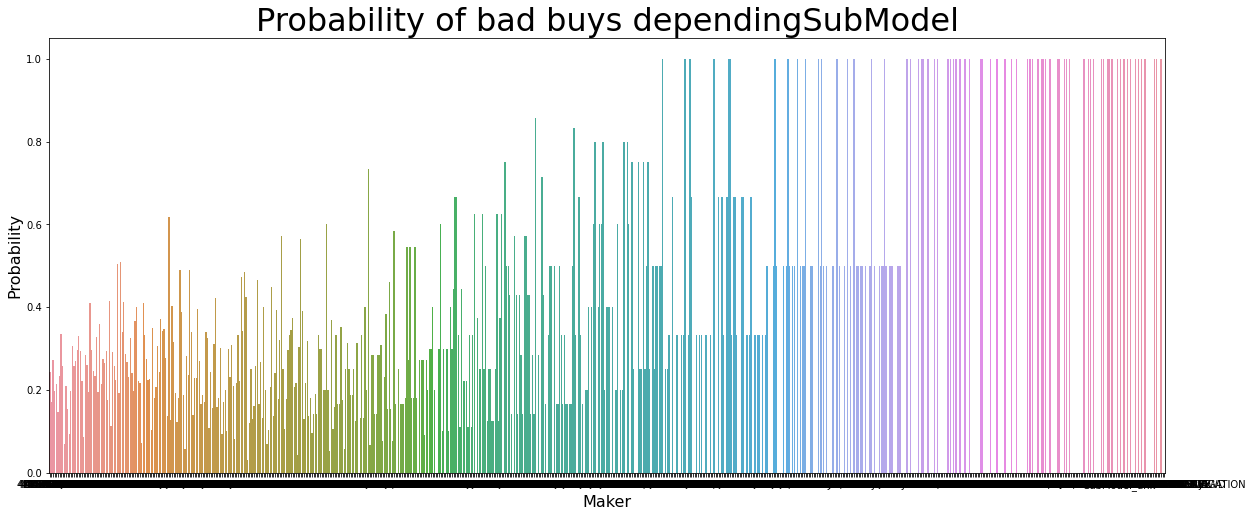

In [49]:
train_df['SubModel'].fillna('SubModel_unk',inplace=True)
test_df['SubModel'].fillna('SubModel_unk',inplace=True)
view_col_basedOnType(isNumerical = False, col_Name = 'SubModel');

In [50]:
refine_labels_of_eachCol_5Layer(df = train_df, test_df = test_df ,targetcolName = 'IsBadBuy',
                         colName = 'SubModel', CriticalRatioList = [0.18, 0.22, 0.28, 0.35, 0.46])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying t

mid2	24.82%	10344
low	12.63%	5489
mid3	31.40%	3506
mid1	20.09%	3375
high1	39.51%	1511
high2	59.63%	1085


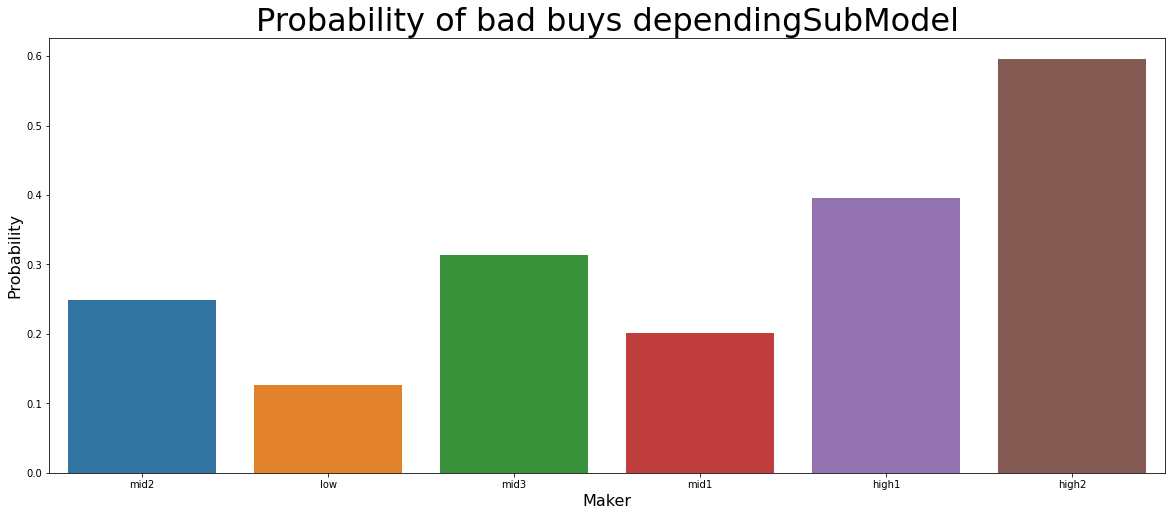

In [51]:
view_col_basedOnType(isNumerical = False, col_Name = 'SubModel')

### Handling WarrantyCost

920.0	21.56%	988
1974.0	15.35%	775
1389.0	20.31%	709
1215.0	21.49%	684
1155.0	24.67%	681
2152.0	17.41%	672
728.0	23.83%	575
1503.0	27.97%	572
803.0	26.10%	567
1243.0	29.78%	544
1086.0	18.47%	536
569.0	22.71%	502
983.0	27.56%	468
1703.0	12.66%	466
1272.0	19.91%	437
1020.0	25.58%	430
853.0	27.10%	417
533.0	21.17%	392
1373.0	19.85%	388
671.0	20.31%	384
1763.0	20.00%	375
1623.0	22.04%	372
1633.0	21.98%	364
754.0	17.77%	349
1506.0	21.55%	348
594.0	28.96%	335
505.0	22.75%	334
834.0	9.88%	324
825.0	24.92%	317
1118.0	16.83%	315
975.0	15.46%	304
693.0	17.56%	279
1038.0	19.42%	278
482.0	15.64%	243
686.0	26.97%	241
623.0	18.06%	216
923.0	12.98%	208
723.0	22.39%	201
1500.0	11.56%	199
1220.0	37.56%	197
1113.0	21.99%	191
1543.0	40.11%	187
1313.0	27.72%	184
1455.0	36.61%	183
1411.0	16.94%	183
1341.0	33.91%	174
1283.0	39.31%	173
1053.0	28.65%	171
1003.0	14.46%	166
630.0	23.87%	155
2091.0	17.11%	152
2063.0	42.07%	145
1630.0	31.47%	143
894.0	37.86%	140
2351.0	19.23%	130
462.0	14.06%	128
1803.0	46.46%	12

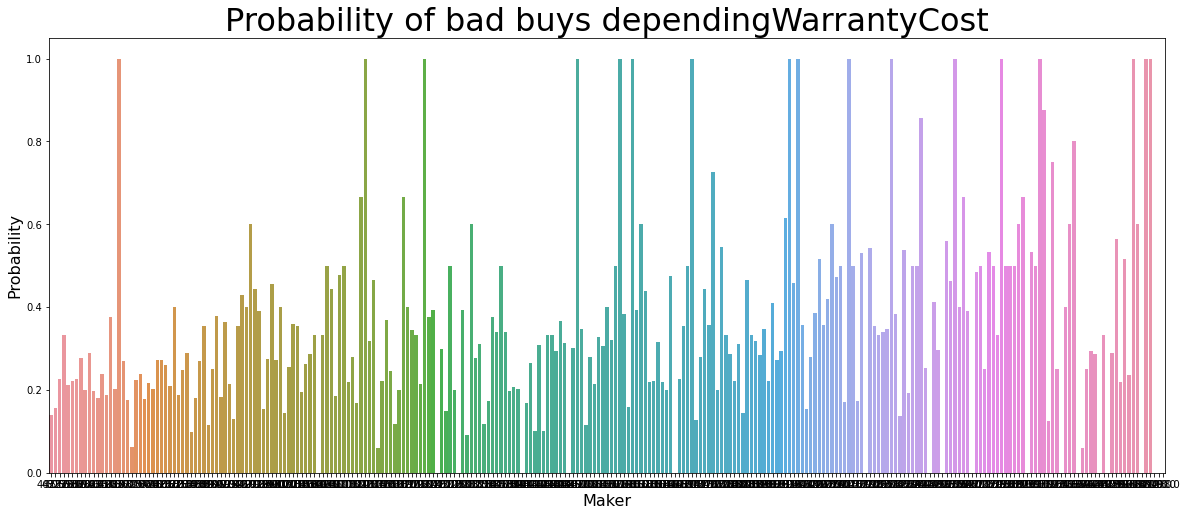

In [52]:
train_df['WarrantyCost'].fillna('WarrantyCost_unk',inplace=True)
test_df['WarrantyCost'].fillna('WarrantyCost_unk',inplace=True)
view_col_basedOnType(isNumerical = False, col_Name = 'WarrantyCost');

In [53]:
refine_labels_of_eachCol_5Layer(df = train_df, test_df = test_df ,targetcolName = 'IsBadBuy',
                         colName = 'WarrantyCost', CriticalRatioList = [0.18, 0.22, 0.28, 0.35, 0.46])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying t

mid1	20.47%	6948
mid2	25.25%	6611
low	14.81%	5421
mid3	30.94%	2893
high1	38.60%	2277
high2	53.02%	1160


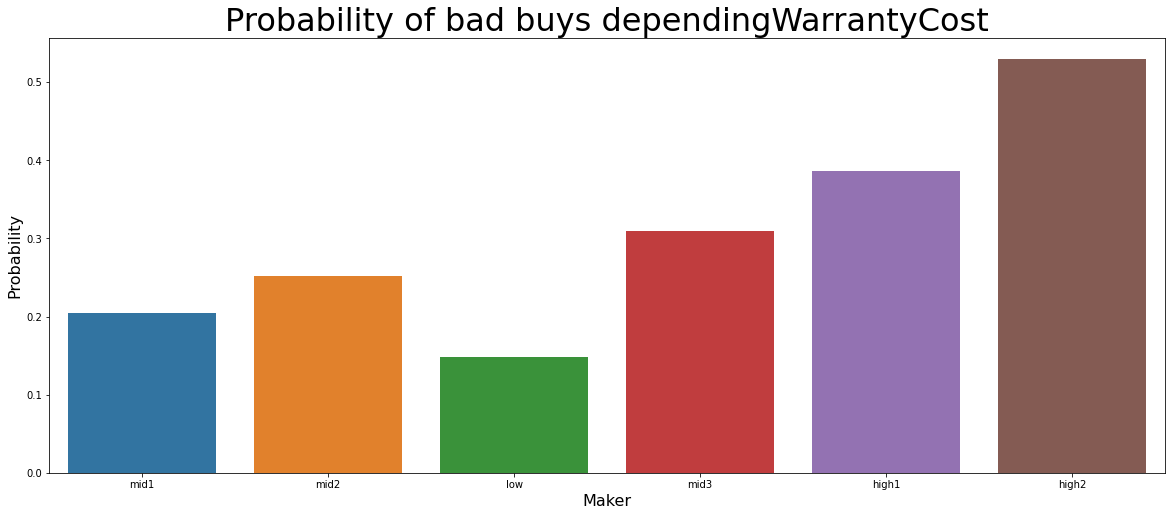

In [54]:
view_col_basedOnType(isNumerical = False, col_Name = 'WarrantyCost')

### Handling VehBCost

7500.0	17.58%	256
4200.0	33.64%	217
6500.0	11.88%	202
7200.0	17.80%	191
6000.0	16.94%	183
7000.0	14.61%	178
8000.0	14.72%	163
7800.0	14.65%	157
6300.0	15.03%	153
7400.0	14.47%	152
7100.0	16.45%	152
7300.0	22.00%	150
5700.0	23.29%	146
6100.0	23.78%	143
6200.0	23.02%	139
6800.0	21.58%	139
5000.0	22.63%	137
5500.0	15.56%	135
6400.0	13.33%	135
7600.0	16.03%	131
5800.0	23.08%	130
5900.0	17.83%	129
4100.0	34.65%	127
6700.0	19.84%	126
8200.0	11.20%	125
5600.0	18.18%	121
5300.0	20.34%	118
7700.0	21.37%	117
6900.0	23.28%	116
5400.0	24.56%	114
8500.0	16.81%	113
6600.0	16.81%	113
5200.0	30.36%	112
5100.0	23.15%	108
7900.0	16.00%	100
4900.0	28.28%	99
8300.0	17.53%	97
4500.0	36.96%	92
8100.0	14.13%	92
4800.0	33.73%	83
4700.0	14.63%	82
4000.0	36.71%	79
4600.0	36.99%	73
8400.0	16.67%	66
4175.0	32.81%	64
3900.0	39.29%	56
4160.0	35.71%	56
9000.0	9.26%	54
6225.0	18.52%	54
4400.0	32.08%	53
8600.0	20.75%	53
9200.0	12.00%	50
8900.0	22.00%	50
8700.0	10.20%	49
7240.0	17.39%	46
7450.0	23.91%	46
7185.0	20.00%	

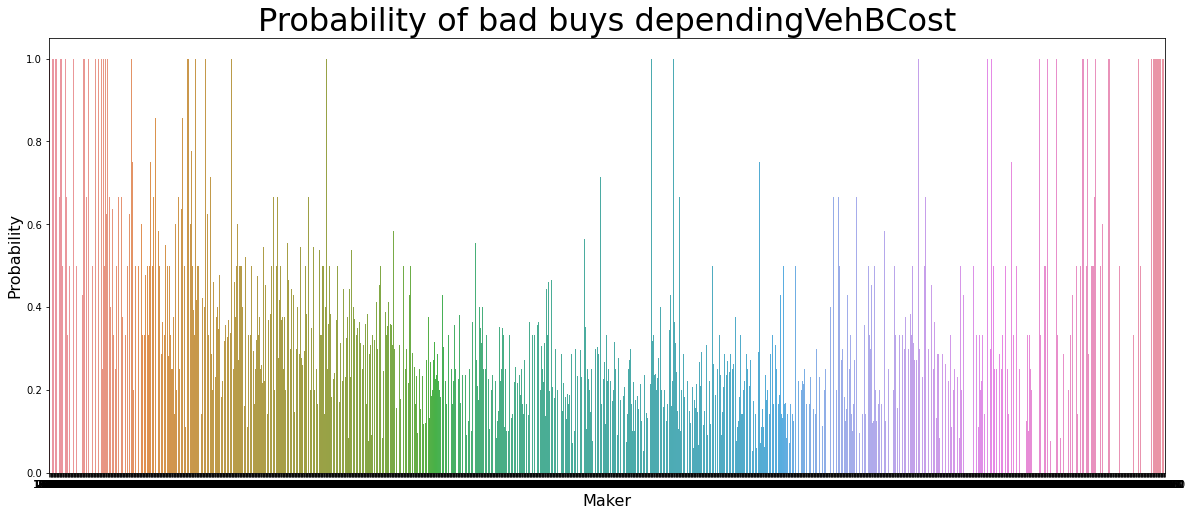

In [55]:
train_df['VehBCost'].fillna('VehBCost_unk',inplace=True)
test_df['VehBCost'].fillna('VehBCost_unk',inplace=True)
view_col_basedOnType(isNumerical = False, col_Name = 'VehBCost');

In [56]:
refine_labels_of_eachCol_5Layer(df = train_df, test_df = test_df ,targetcolName = 'IsBadBuy',
                         colName = 'VehBCost', CriticalRatioList = [0.18, 0.22, 0.28, 0.35, 0.46])

流式输出内容被截断，只能显示最后 5000 行内容。
See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable

low	12.05%	9171
mid2	24.28%	4600
mid3	31.62%	3732
mid1	20.14%	2979
high1	39.27%	2875
high2	58.99%	1953


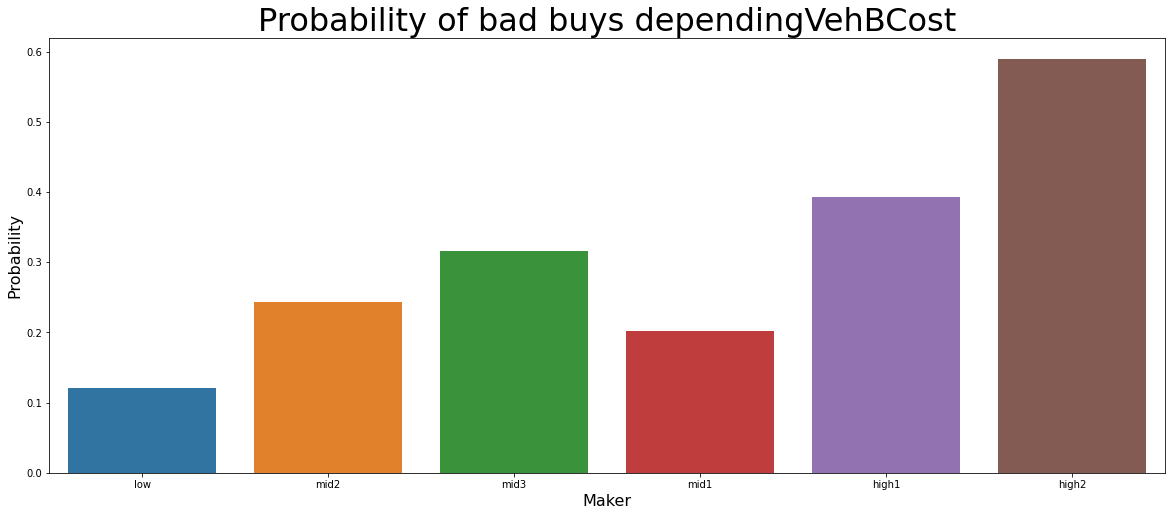

In [57]:
view_col_basedOnType(isNumerical = False, col_Name = 'VehBCost')

### Handling Size

MEDIUM	23.44%	10578
LARGE	18.83%	2964
MEDIUM SUV	29.38%	2873
COMPACT	31.12%	2600
VAN	25.68%	2009
LARGE TRUCK	23.26%	1092
SMALL SUV	27.42%	806
SPECIALTY	17.89%	654
CROSSOVER	22.04%	608
LARGE SUV	31.16%	536
SMALL TRUCK	27.52%	298
SPORTS	35.05%	291
Size_unk	0.00%	1


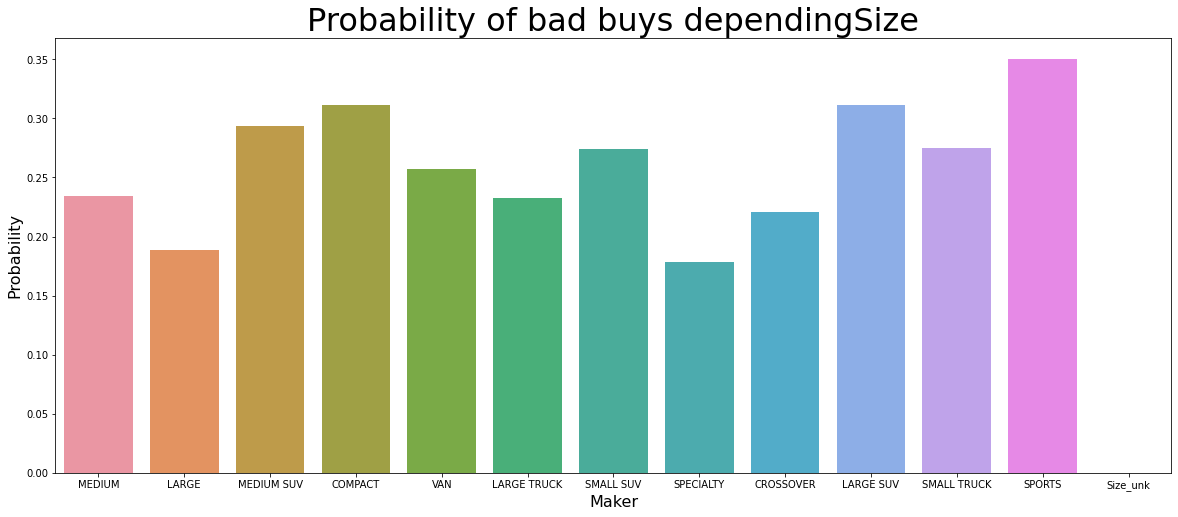

In [58]:
train_df['Size'].fillna('Size_unk',inplace=True)
test_df['Size'].fillna('Size_unk',inplace=True)
view_col_basedOnType(isNumerical = False, col_Name = 'Size');

In [59]:
refine_labels_of_eachCol_5Layer(df = train_df, test_df = test_df ,targetcolName = 'IsBadBuy',
                         colName = 'Size', CriticalRatioList = [0.18, 0.22, 0.28, 0.35, 0.46])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying t

mid2	23.95%	15391
mid3	30.29%	6009
mid1	18.83%	2964
low	17.86%	655
high1	35.05%	291


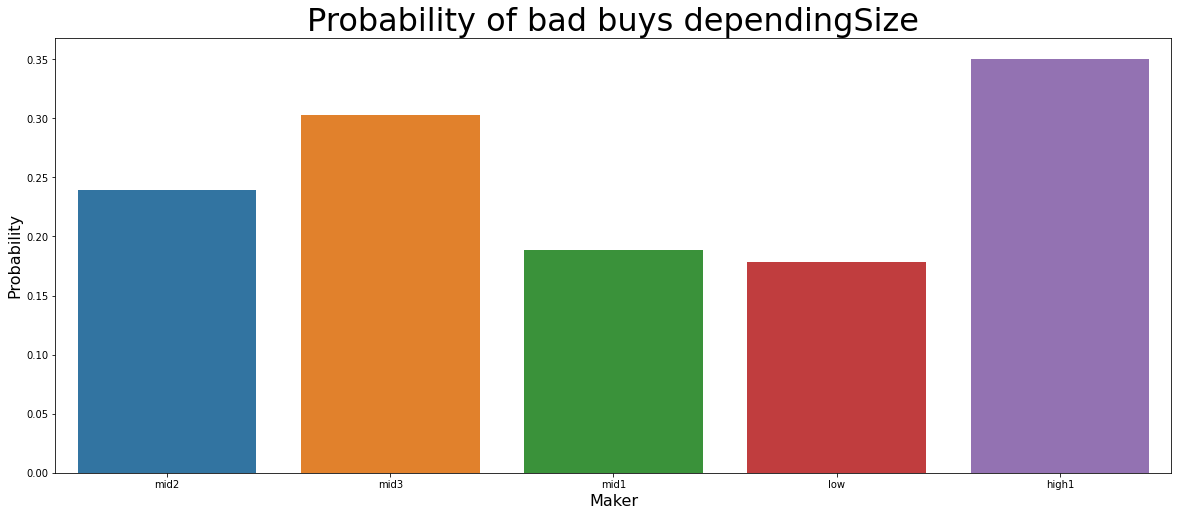

In [60]:
view_col_basedOnType(isNumerical = False, col_Name = 'Size')

### Delete VehOdo ---  need to call drop_ByColName('VehOdo') later


In [61]:
def drop_ByColName(col_name):
  train_df.drop([col_name],axis=1,inplace=True)
  test_df.drop([col_name],axis=1,inplace=True)

In [62]:
drop_ByColName('VehOdo')

### Replace Transmission --- combine Manual and MANUAL

In [63]:
def handle_differentExpressionOfSameLabels(col_Name, original_Key, new_Key):
  # train_df.Transmission.value_counts(dropna=False)
  train_df["Transmission"].replace("Manual","MANUAL",inplace=True)
  # train_df.Transmission.value_counts(dropna=False)

  # test_df.Transmission.value_counts(dropna=False)
  test_df["Transmission"].replace("Manual","MANUAL",inplace=True)
  # test_df.Transmission.value_counts(dropna=False)

In [64]:
handle_differentExpressionOfSameLabels("Transmission", "Manual", "MANUAL")

In [65]:
# train_df.Nationality.value_counts(dropna=False)

In [66]:
# train_df.Size.value_counts(dropna=False)

In [67]:
# px.histogram(train_df, x = "Size", color = "IsBadBuy",height=500,width=800)

# Data Cleaning


In [68]:
targets=train_df['IsBadBuy']
train_df.drop('IsBadBuy',axis=1,inplace=True)

### Hot-Encoder

In [69]:
# Due to different versions of libraries OneHotEncoder is not working efficiently (i.e not able to deal with NaN values)
train_df.Make.fillna('Make_unk',inplace=True)
train_df.Transmission.fillna('Trans_unk',inplace=True)
train_df.WheelType.fillna('WheelType_unk',inplace=True)
train_df.Nationality.fillna('Nationality_unk',inplace=True)
train_df.Size.fillna('Trans_unk',inplace=True)
train_df.Color.fillna('Color_unk',inplace=True)


In [70]:
test_df.Make.fillna('Make_unk',inplace=True)
test_df.Size.fillna('Trans_unk',inplace=True)
test_df.WheelType.fillna('Trans_unk',inplace=True)
test_df.Nationality.fillna('Trans_unk',inplace=True)
test_df.Transmission.fillna('Trans_unk',inplace=True)
test_df.Color.fillna('Color_unk',inplace=True)

In [71]:
categorical_cols = train_df.select_dtypes(include = 'object').columns.tolist()
numeric_cols = train_df.select_dtypes(exclude='object').columns.tolist()

In [72]:
from sklearn.preprocessing import OneHotEncoder
encoder=OneHotEncoder(sparse=False,handle_unknown='ignore')
encoder.fit(train_df[categorical_cols])
encoded_cols=list(encoder.get_feature_names_out(categorical_cols))
train_df[encoded_cols]=encoder.transform(train_df[categorical_cols]);
test_df[encoded_cols]=encoder.transform(test_df[categorical_cols]);
# get_feature_names_out

In [73]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(train_df[numeric_cols]);
train_df[numeric_cols]=scaler.transform(train_df[numeric_cols])
test_df[numeric_cols]=scaler.transform(test_df[numeric_cols])

In [74]:
# train_df_categorical_cols = train_df.select_dtypes(include = 'object').columns.tolist()
# train_df_numeric_cols = train_df.select_dtypes(exclude='object').columns.tolist()

In [75]:
# test_df_categorical_cols = test_df.select_dtypes(include = 'object').columns.tolist()
# test_df_numeric_cols = test_df.select_dtypes(exclude='object').columns.tolist()

In [76]:
# from sklearn.preprocessing import OneHotEncoder
# encoder=OneHotEncoder(sparse=False,handle_unknown='ignore')

# categorical_cols = train_df_categorical_cols
# encoder.fit(train_df[categorical_cols])
# encoded_cols = list(encoder.get_feature_names_out(categorical_cols))
# train_df[encoded_cols] = encoder.transform(train_df[categorical_cols]);

# # encoder.fit(test_df[categorical_cols])
# encoded_cols=list(encoder.get_feature_names_out(categorical_cols))
# # train_df[encoded_cols] = encoder.transform(train_df[categorical_cols]);
# test_df[encoded_cols] = encoder.transform(test_df[categorical_cols]);
# # get_feature_names_out


# # from sklearn.preprocessing import LabelEncoder

# # le = LabelEncoder()
# # c = alldata2.columns[alldata2.dtypes == object]

# # for i in c:
# #     alldata2[i] = le.fit_transform(list(alldata2[i]))

In [77]:
# from sklearn.preprocessing import MinMaxScaler
# scaler = MinMaxScaler()
# scaler.fit(train_df[numeric_cols]);
# train_df[numeric_cols]=scaler.transform(train_df[numeric_cols])
# test_df[numeric_cols]=scaler.transform(test_df[numeric_cols])

In [78]:
train_df=train_df[numeric_cols+encoded_cols]
test_df=test_df[numeric_cols+encoded_cols]

In [79]:
# from sklearn.model_selection import train_test_split
# train_df_backUp = train_df
# targets_backUp = targets
# test_df_backUp = test_df
# inputs,val_inputs,targets,val_targets = train_test_split(train_df,targets,test_size=0.3, random_state=42)

### Save current Data!

In [80]:
train_df.to_csv('Train_df.csv',index=False)

In [81]:
targets.to_csv('targets.csv',index=False)

In [82]:
test_df.to_csv('test_df.csv',index=False)

### Download it

In [91]:
from google.colab import files
files.download('Train_df.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [96]:
files.download('targets.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [93]:
files.download('test_df.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### Toy try!

In [85]:
# train_df.to_csv('Train_df.csv',index=False)
train_df_backUp = train_df
targets_backUp = targets
test_df_backUp = test_df
from sklearn.ensemble import RandomForestClassifier    
model = RandomForestClassifier()
model.fit(train_df_backUp,targets_backUp)

preds = model.predict(test_df_backUp)
submissions_df['Predicted'] = preds

submissions_df.to_csv('Submissions_RDF_Dec5.csv',index=False)

In [95]:
files.download('Submissions_RDF_Dec5.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [87]:
# won't run
# exit(0)